<a href="https://colab.research.google.com/github/caroSF1/Extracci-n-de-las-caracter-sticas/blob/main/Act4_Extracci%C3%B3n_de_caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 4. Extracción de características**
## **Carolina Solis Flores**
## **A01708072**

In [ ]:
#Instalamos librería para análisis de variables categóricas
!pip install funpymodeling

In [2]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [4]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [5]:
#Verificamos información del DataFrame
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [6]:
#Imprimo los primeros 5 registro del dataframe
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


## **3. Aplicar métodos para remplazar valores nulos del dataframe**

In [7]:
valores_nulos=Micro_Retailer.isnull().sum()
valores_nulos

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64

In [8]:
valores_nulos=Micro_Retailer.isnull().sum().sum()
valores_nulos

9844

In [9]:
num = Micro_Retailer.select_dtypes(include = ["number"])
obj = Micro_Retailer.select_dtypes(include = ["object"])

In [10]:
valores_nulos=num.isnull().sum()
valores_nulos

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        0
268_number_fridges                                     3
104_how_many_shelves_does_the_micro_retailer_have      0
2_current_permanent_employees                         60
4_number_permanent_employees_last_year                76
103_number_own_fridges                               144
145_number_direct_competitors                         68
24_burnout                                           133
271_card_fee                                         171
272_card_days_receive_money                          127
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                    147
36_credit_default_rate                               157
315_frequency_topups           

In [11]:
num2=num.copy()
num2=num2.fillna(round(num.mean(),1))
num2

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2,0.0,4,2.0,2.0,2.5,3.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
1,19.053561,-98.234142,0,4.0,8,1.0,1.0,2.5,4.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,60.0,2.790144e+09
2,19.058655,-98.232300,0,0.0,24,2.0,2.0,2.5,0.0,4.2,...,10.0,1.6,9.0,28.5,13.6,10.5,2.0,3.0,60.0,2.790144e+09
3,19.059293,-98.233158,0,0.0,2,1.0,1.0,2.5,4.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
4,19.059585,-98.233864,0,0.0,16,0.0,0.0,2.5,0.0,4.2,...,15.0,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1,0.0,5,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
167,19.042794,-98.193802,1,5.0,5,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
168,19.042809,-98.193439,3,1.0,1,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
169,19.042558,-98.193818,0,1.0,1,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09


In [12]:
valores_nulos=num2.isnull().sum()
valores_nulos

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        0
268_number_fridges                                     0
104_how_many_shelves_does_the_micro_retailer_have      0
2_current_permanent_employees                          0
4_number_permanent_employees_last_year                 0
103_number_own_fridges                                 0
145_number_direct_competitors                          0
24_burnout                                             0
271_card_fee                                         171
272_card_days_receive_money                            0
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                      0
36_credit_default_rate                                 0
315_frequency_topups           

In [13]:
valores_nulos=obj.isnull().sum()
valores_nulos

_record_id                                          0
_title                                              0
_server_updated_at                                  0
_updated_by                                         0
_geometry                                           0
                                                 ... 
267_technology_investment_customer_preferences    101
234_willingness_participate_workshop               73
318_shopkeeper_name                               123
319_shopkeepers_last_name                         125
235_email                                         142
Length: 81, dtype: int64

In [14]:
dfobj= obj.fillna(method="bfill") 
dfobj

,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,...,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),no,yes,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Libélula,1 Photo,Grocery store (aka. nanostore),yes,no,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),Quality fix,1 Photo,Grocery store (aka. nanostore),no,no,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),yes,no,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),July Store,1 Photo,Grocery store (aka. nanostore),yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),La fonda,1 Photo,Micro-restaurant (aka. fondita),yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
valores_nulos=dfobj.isnull().sum()
valores_nulos

_record_id                                        0
_title                                            0
_server_updated_at                                0
_updated_by                                       0
_geometry                                         0
                                                 ..
267_technology_investment_customer_preferences    5
234_willingness_participate_workshop              5
318_shopkeeper_name                               5
319_shopkeepers_last_name                         5
235_email                                         5
Length: 81, dtype: int64

In [16]:
dfobj= obj.fillna(method="ffill") 
dfobj.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,...,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),no,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Libélula,1 Photo,Grocery store (aka. nanostore),yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),Quality fix,1 Photo,Grocery store (aka. nanostore),no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN


In [17]:
valores_nulos=dfobj.isnull().sum()
valores_nulos

_record_id                                        0
_title                                            0
_server_updated_at                                0
_updated_by                                       0
_geometry                                         0
                                                 ..
267_technology_investment_customer_preferences    6
234_willingness_participate_workshop              0
318_shopkeeper_name                               7
319_shopkeepers_last_name                         7
235_email                                         7
Length: 81, dtype: int64

## **4. Aplicar métodos para eliminar outliers del dataframe**

In [18]:
y=num2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido _latitude                                            1.913877e+01
_longitude                                          -9.807532e+01
97_number_of_customers_in_store                      5.000000e+00
268_number_fridges                                   5.000000e+00
104_how_many_shelves_does_the_micro_retailer_have    1.600000e+01
2_current_permanent_employees                        3.750000e+00
4_number_permanent_employees_last_year               3.250000e+00
103_number_own_fridges                               2.500000e+00
145_number_direct_competitors                        6.750000e+00
24_burnout                                           4.200000e+00
271_card_fee                                                  NaN
272_card_days_receive_money                          1.000000e+00
273_platform_extra_charge                                     NaN
274_platform_fee                                              NaN
275_platform_days_receive_money                   

In [19]:
#Encontramos Outliers del Dataframe
outliers_iqr= num2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN
2,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Obtenemos datos limpios del Dataframe
num2_iqr= num2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
num2_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,2.5,3.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,2.5,4.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,NaN,2.790144e+09
2,19.058655,-98.232300,0.0,0.0,NaN,2.0,2.0,2.5,0.0,4.2,...,NaN,1.6,9.0,28.5,13.6,10.5,2.0,3.0,NaN,2.790144e+09
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,2.5,4.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,2.5,0.0,4.2,...,NaN,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
167,19.042794,-98.193802,1.0,5.0,5.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
168,19.042809,-98.193439,3.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
169,19.042558,-98.193818,0.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09


In [21]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=num2_iqr.isnull().sum()
valores_nulos

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        5
268_number_fridges                                    10
104_how_many_shelves_does_the_micro_retailer_have      9
2_current_permanent_employees                         15
4_number_permanent_employees_last_year                12
103_number_own_fridges                                27
145_number_direct_competitors                         15
24_burnout                                            38
271_card_fee                                         171
272_card_days_receive_money                           14
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                     24
36_credit_default_rate                                14
315_frequency_topups           

In [22]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
numm2_iqr=num2_iqr.copy()
numm2_iqr=numm2_iqr.fillna(round(num2_iqr.mean(),1))
numm2_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,2.5,3.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,2.5,4.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,6.1,2.790144e+09
2,19.058655,-98.232300,0.0,0.0,4.0,2.0,2.0,2.5,0.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,6.1,2.790144e+09
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,2.5,4.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,2.5,0.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
167,19.042794,-98.193802,1.0,5.0,5.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
168,19.042809,-98.193439,3.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
169,19.042558,-98.193818,0.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09


In [23]:
Datos_limpios = pd.concat([numm2_iqr, dfobj], axis=1)
Datos_limpios

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,2.5,3.0,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,2.5,4.0,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
2,19.058655,-98.232300,0.0,0.0,4.0,2.0,2.0,2.5,0.0,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,2.5,4.0,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,2.5,0.0,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,2.1,1.9,2.5,3.8,4.2,...,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,Hachi401096@gmail.com
167,19.042794,-98.193802,1.0,5.0,5.0,2.1,1.9,2.5,3.8,4.2,...,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,Hachi401096@gmail.com
168,19.042809,-98.193439,3.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,...,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,Hachi401096@gmail.com
169,19.042558,-98.193818,0.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,...,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,Hachi401096@gmail.com


In [24]:
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

_latitude                                            0
_longitude                                           0
97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
                                                    ..
267_technology_investment_customer_preferences       6
234_willingness_participate_workshop                 0
318_shopkeeper_name                                  7
319_shopkeepers_last_name                            7
235_email                                            7
Length: 106, dtype: int64

##**5. Análisis univariado**

In [25]:
dfobj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 81 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   _record_id                                                  171 non-null    object
 1   _title                                                      171 non-null    object
 2   _server_updated_at                                          171 non-null    object
 3   _updated_by                                                 171 non-null    object
 4   _geometry                                                   171 non-null    object
 5   228_store_name                                              171 non-null    object
 6   229_store_picture                                           171 non-null    object
 7   232_type_of_store                                           171 non-null    object
 8   108_does_t

## **Variable Categórica 1**
'234_willingness_participate_workshop'

In [26]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['234_willingness_participate_workshop'])
table1

,234_willingness_participate_workshop,frequency,percentage,cumulative_perc
0,no,89,0.520468,0.520468
1,yes,82,0.479532,1.000000


In [27]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,234_willingness_participate_workshop,frequency,percentage,cumulative_perc
0,no,89,0.520468,0.520468
1,yes,82,0.479532,1.000000


In [28]:
Filtro_index= Filtro.set_index('234_willingness_participate_workshop')
Filtro_index

,frequency,percentage,cumulative_perc
234_willingness_participate_workshop,,,
no,89,0.520468,0.520468
yes,82,0.479532,1.000000


Text(0, 0.5, 'Frecuencia')

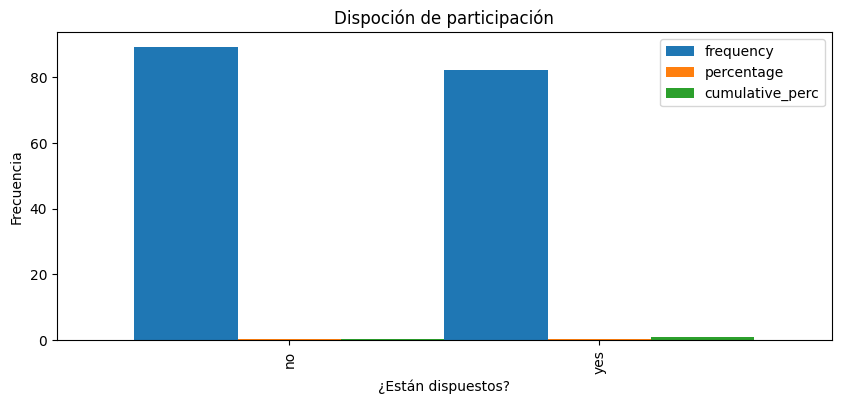

In [29]:
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Dispoción de participación')
plt.xlabel('¿Están dispuestos?')
plt.ylabel('Frecuencia')

## **Variable Categórica 2**
'184_store_devices'

In [30]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(Datos_limpios['184_store_devices'])
table2

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123
8,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.672515
9,"Analog cash register,Security cameras",4,0.023392,0.695906


In [31]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table2[table2['frequency']>8]
Filtro

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924


In [32]:
Filtro_index2= Filtro.set_index('184_store_devices')
Filtro_index2

,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,52,0.304094,0.304094
Analog cash register,16,0.093567,0.397661
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.450292
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.502924


<Axes: ylabel='frequency'>

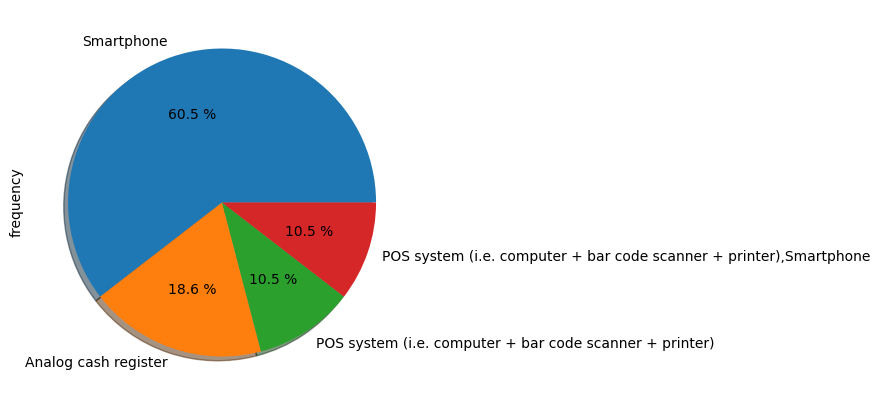

In [33]:
Filtro_index2["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variables Categóricas 3**
'278_credit_interest'

In [34]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(Datos_limpios['278_credit_interest'])
table3

,278_credit_interest,frequency,percentage,cumulative_perc
0,0,125,0.730994,0.78125
1,3-5%,20,0.116959,0.90625
2,1-2%,11,0.064327,0.97500
3,9%+,2,0.011696,0.98750
4,6-8%,2,0.011696,1.00000


In [35]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table3[table3['frequency']>1]
Filtro

,278_credit_interest,frequency,percentage,cumulative_perc
0,0,125,0.730994,0.78125
1,3-5%,20,0.116959,0.90625
2,1-2%,11,0.064327,0.97500
3,9%+,2,0.011696,0.98750
4,6-8%,2,0.011696,1.00000


In [36]:
Filtro_index3= Filtro.set_index('278_credit_interest')
Filtro_index3

,frequency,percentage,cumulative_perc
278_credit_interest,,,
0,125,0.730994,0.78125
3-5%,20,0.116959,0.90625
1-2%,11,0.064327,0.97500
9%+,2,0.011696,0.98750
6-8%,2,0.011696,1.00000


<Axes: ylabel='frequency'>

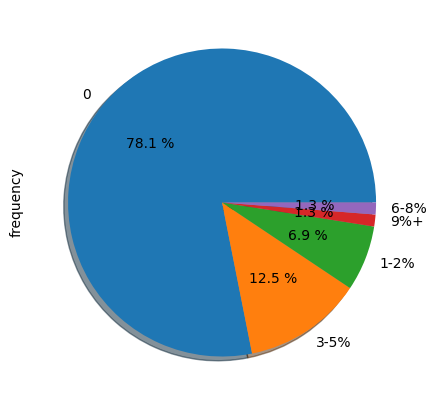

In [37]:
Filtro_index3["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variables Categóricas 4**
'314_reception_delivery_packages'

In [38]:
#Obtengo un análisis univariado de una variable categórica en específico
table4= freq_tbl(Datos_limpios['314_reception_delivery_packages'])
table4

,314_reception_delivery_packages,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,108,0.631579,0.670807
1,Algo de acuerdo,23,0.134503,0.813665
2,Totalmente de acuerdo,17,0.099415,0.919255
3,Algo en desacuerdo,9,0.052632,0.975155
4,Ni de acuerdo ni en desacuerdo,4,0.023392,1.000000


In [39]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table4[table4['frequency']>1]
Filtro

,314_reception_delivery_packages,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,108,0.631579,0.670807
1,Algo de acuerdo,23,0.134503,0.813665
2,Totalmente de acuerdo,17,0.099415,0.919255
3,Algo en desacuerdo,9,0.052632,0.975155
4,Ni de acuerdo ni en desacuerdo,4,0.023392,1.000000


In [40]:
Filtro_index4= Filtro.set_index('314_reception_delivery_packages')
Filtro_index4

,frequency,percentage,cumulative_perc
314_reception_delivery_packages,,,
Totalmente en desacuerdo,108,0.631579,0.670807
Algo de acuerdo,23,0.134503,0.813665
Totalmente de acuerdo,17,0.099415,0.919255
Algo en desacuerdo,9,0.052632,0.975155
Ni de acuerdo ni en desacuerdo,4,0.023392,1.000000


Text(0, 0.5, 'Frecuencia')

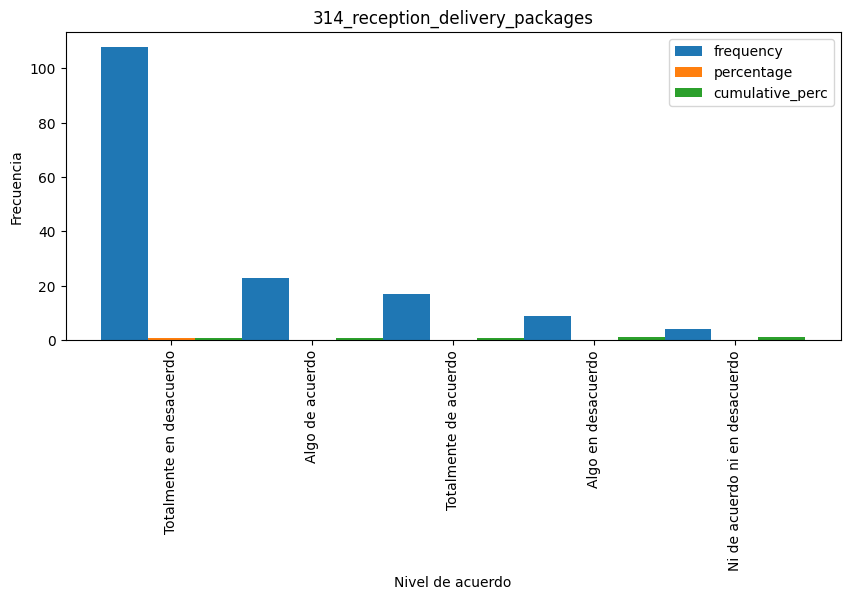

In [41]:
Filtro_index4.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('314_reception_delivery_packages')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')

## **Variables Categóricas 5**
'79_delivery_vehicle'

In [42]:
#Obtengo un análisis univariado de una variable categórica en específico
table5= freq_tbl(Datos_limpios['79_delivery_vehicle'])
table5

,79_delivery_vehicle,frequency,percentage,cumulative_perc
0,El cliente los recoge en tienda,92,0.538012,0.938776
1,Automóvil,6,0.035088,1.000000


In [43]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table5[table5['frequency']>=1]
Filtro

,79_delivery_vehicle,frequency,percentage,cumulative_perc
0,El cliente los recoge en tienda,92,0.538012,0.938776
1,Automóvil,6,0.035088,1.000000


In [44]:
Filtro_index5= Filtro.set_index('79_delivery_vehicle')
Filtro_index5

,frequency,percentage,cumulative_perc
79_delivery_vehicle,,,
El cliente los recoge en tienda,92,0.538012,0.938776
Automóvil,6,0.035088,1.000000


<Axes: ylabel='frequency'>

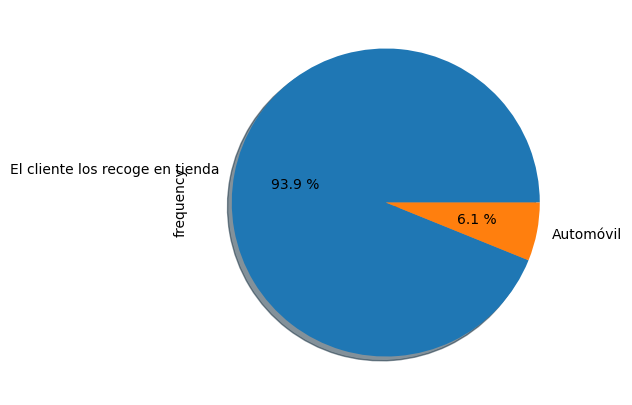

In [45]:
Filtro_index5["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variables Categóricas 6**
'69_why_not_services'

In [46]:
#Obtengo un análisis univariado de una variable categórica en específico
table6= freq_tbl(Datos_limpios['69_why_not_services'])
table6

,69_why_not_services,frequency,percentage,cumulative_perc
0,No conozco los servicios,38,0.222222,0.236025
1,Es muy caro,24,0.140351,0.385093
2,No creo que represente grandes ingresos,17,0.099415,0.490683
3,No quiero involucrarme con la tecnología,16,0.093567,0.590062
4,Se vende ropa,15,0.087719,0.683230
5,"Es muy caro,No conozco los servicios,No creo q...",10,0.058480,0.745342
6,"Es muy caro,No quiero involucrarme con la tecn...",10,0.058480,0.807453
7,"Es muy caro,No creo que represente grandes ing...",7,0.040936,0.850932
8,no es requerido,4,0.023392,0.875776
9,"No conozco los servicios,No quiero involucrarm...",4,0.023392,0.900621


In [47]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table6[table6['frequency']>1]
Filtro

,69_why_not_services,frequency,percentage,cumulative_perc
0,No conozco los servicios,38,0.222222,0.236025
1,Es muy caro,24,0.140351,0.385093
2,No creo que represente grandes ingresos,17,0.099415,0.490683
3,No quiero involucrarme con la tecnología,16,0.093567,0.590062
4,Se vende ropa,15,0.087719,0.683230
5,"Es muy caro,No conozco los servicios,No creo q...",10,0.058480,0.745342
6,"Es muy caro,No quiero involucrarme con la tecn...",10,0.058480,0.807453
7,"Es muy caro,No creo que represente grandes ing...",7,0.040936,0.850932
8,no es requerido,4,0.023392,0.875776
9,"No conozco los servicios,No quiero involucrarm...",4,0.023392,0.900621


In [48]:
Filtro_index6= Filtro.set_index('69_why_not_services')
Filtro_index6

,frequency,percentage,cumulative_perc
69_why_not_services,,,
No conozco los servicios,38,0.222222,0.236025
Es muy caro,24,0.140351,0.385093
No creo que represente grandes ingresos,17,0.099415,0.490683
No quiero involucrarme con la tecnología,16,0.093567,0.590062
Se vende ropa,15,0.087719,0.683230
"Es muy caro,No conozco los servicios,No creo que represente grandes ingresos",10,0.058480,0.745342
"Es muy caro,No quiero involucrarme con la tecnología",10,0.058480,0.807453
"Es muy caro,No creo que represente grandes ingresos,pérdidas",7,0.040936,0.850932
no es requerido,4,0.023392,0.875776


<Axes: ylabel='frequency'>

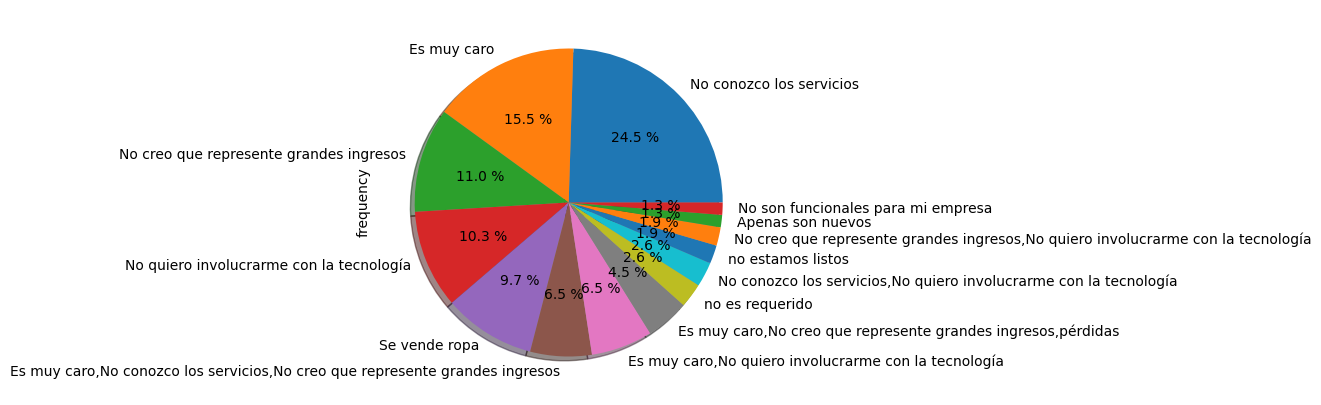

In [49]:
Filtro_index6["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variables Categóricas 7**
'186_internet_connection'

In [50]:
#Obtengo un análisis univariado de una variable categórica en específico
table7= freq_tbl(Datos_limpios['186_internet_connection'])
table7

,186_internet_connection,frequency,percentage,cumulative_perc
0,yes,114,0.666667,0.666667
1,no,57,0.333333,1.000000


In [51]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table7[table7['frequency']>1]
Filtro

,186_internet_connection,frequency,percentage,cumulative_perc
0,yes,114,0.666667,0.666667
1,no,57,0.333333,1.000000


In [52]:
Filtro_index7= Filtro.set_index('186_internet_connection')
Filtro_index7

,frequency,percentage,cumulative_perc
186_internet_connection,,,
yes,114,0.666667,0.666667
no,57,0.333333,1.000000


<Axes: ylabel='frequency'>

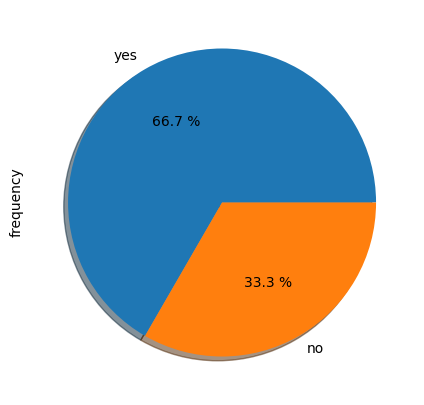

In [53]:
Filtro_index7["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variables Categóricas 8**
'157_frequency_organize_shelves'

In [54]:
#Obtengo un análisis univariado de una variable categórica en específico
table8= freq_tbl(Datos_limpios['157_frequency_organize_shelves'])
table8

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Diariamente,67,0.391813,0.391813
1,Semanalmente,66,0.385965,0.777778
2,Nunca,16,0.093567,0.871345
3,Mensualmente,12,0.070175,0.941520
4,Quincenalmente,5,0.029240,0.970760
5,Semestralmente,2,0.011696,0.982456
6,Anualmente,2,0.011696,0.994152
7,No se tiene,1,0.005848,1.000000


In [55]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table8[table8['frequency']>1]
Filtro

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Diariamente,67,0.391813,0.391813
1,Semanalmente,66,0.385965,0.777778
2,Nunca,16,0.093567,0.871345
3,Mensualmente,12,0.070175,0.941520
4,Quincenalmente,5,0.029240,0.970760
5,Semestralmente,2,0.011696,0.982456
6,Anualmente,2,0.011696,0.994152


In [56]:
Filtro_index8= Filtro.set_index('157_frequency_organize_shelves')
Filtro_index8

,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
Diariamente,67,0.391813,0.391813
Semanalmente,66,0.385965,0.777778
Nunca,16,0.093567,0.871345
Mensualmente,12,0.070175,0.941520
Quincenalmente,5,0.029240,0.970760
Semestralmente,2,0.011696,0.982456
Anualmente,2,0.011696,0.994152


Text(0, 0.5, 'Frecuencia')

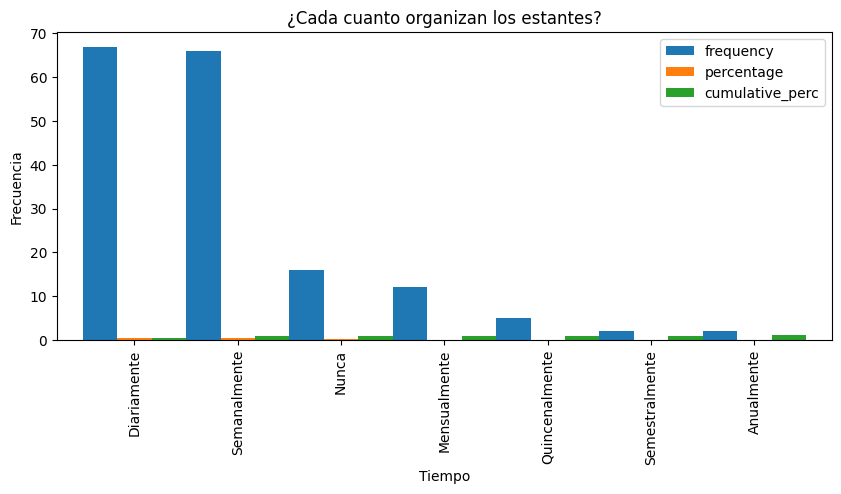

In [57]:
Filtro_index8.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('¿Cada cuanto organizan los estantes?')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')

## **Variables Categóricas 9**
'264_technology_budget'

In [58]:
#Obtengo un análisis univariado de una variable categórica en específico
table9= freq_tbl(Datos_limpios['264_technology_budget'])
table9

,264_technology_budget,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,58,0.339181,0.351515
1,De acuerdo,35,0.204678,0.563636
2,Ni de acuerdo ni en desacuerdo,28,0.163743,0.733333
3,En desacuerdo,25,0.146199,0.884848
4,Totalmente de acuerdo,19,0.111111,1.000000


In [59]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table9[table9['frequency']>1]
Filtro

,264_technology_budget,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,58,0.339181,0.351515
1,De acuerdo,35,0.204678,0.563636
2,Ni de acuerdo ni en desacuerdo,28,0.163743,0.733333
3,En desacuerdo,25,0.146199,0.884848
4,Totalmente de acuerdo,19,0.111111,1.000000


In [60]:
Filtro_index9= Filtro.set_index('264_technology_budget')
Filtro_index9

,frequency,percentage,cumulative_perc
264_technology_budget,,,
Totalmente en desacuerdo,58,0.339181,0.351515
De acuerdo,35,0.204678,0.563636
Ni de acuerdo ni en desacuerdo,28,0.163743,0.733333
En desacuerdo,25,0.146199,0.884848
Totalmente de acuerdo,19,0.111111,1.000000


<Axes: ylabel='frequency'>

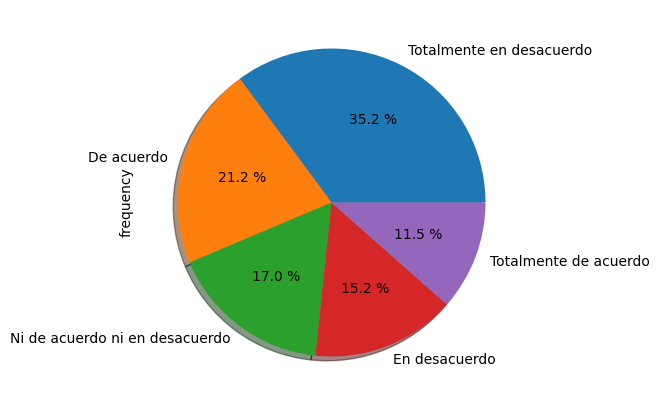

In [61]:
Filtro_index9["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variables Categóricas 10**
254_technology_roadmap 

In [62]:
#Obtengo un análisis univariado de una variable categórica en específico
table10= freq_tbl(Datos_limpios['254_technology_roadmap'])
table10

,254_technology_roadmap,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,77,0.450292,0.478261
1,Ni de acuerdo ni en desacuerdo,25,0.146199,0.633540
2,Totalmente de acuerdo,22,0.128655,0.770186
3,En desacuerdo,19,0.111111,0.888199
4,De acuerdo,18,0.105263,1.000000


In [63]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table10[table10['frequency']>1]
Filtro

,254_technology_roadmap,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,77,0.450292,0.478261
1,Ni de acuerdo ni en desacuerdo,25,0.146199,0.633540
2,Totalmente de acuerdo,22,0.128655,0.770186
3,En desacuerdo,19,0.111111,0.888199
4,De acuerdo,18,0.105263,1.000000


In [64]:
Filtro_index10= Filtro.set_index('254_technology_roadmap')
Filtro_index10

,frequency,percentage,cumulative_perc
254_technology_roadmap,,,
Totalmente en desacuerdo,77,0.450292,0.478261
Ni de acuerdo ni en desacuerdo,25,0.146199,0.633540
Totalmente de acuerdo,22,0.128655,0.770186
En desacuerdo,19,0.111111,0.888199
De acuerdo,18,0.105263,1.000000


<Axes: ylabel='frequency'>

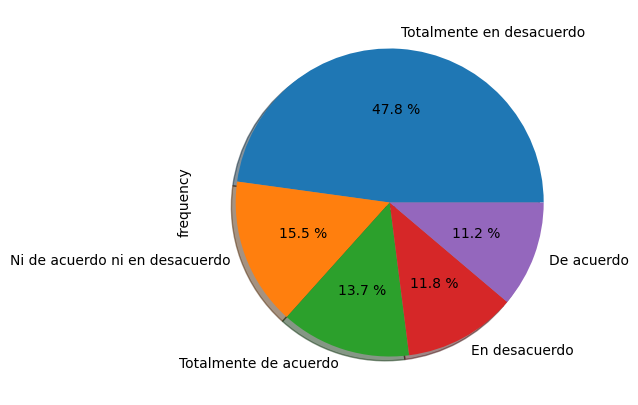

In [65]:
Filtro_index10["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variables Categóricas 11**
'185_place_orders_suppliers'

In [66]:
#Obtengo un análisis univariado de una variable categórica en específico
table11= freq_tbl(Datos_limpios['185_place_orders_suppliers'])
table11

,185_place_orders_suppliers,frequency,percentage,cumulative_perc
0,En persona,50,0.292398,0.310559
1,Llamada telefónica,20,0.116959,0.434783
2,"En persona,Llamada telefónica",18,0.105263,0.546584
3,"En persona,Mensajería instantánea (e.g. WhatsApp)",16,0.093567,0.645963
4,Mensajería instantánea (e.g. WhatsApp),11,0.064327,0.714286
5,"En persona,Llamada telefónica,Mensajería insta...",8,0.046784,0.763975
6,"Mensaje de texto (SMS),Mensajería instantánea ...",7,0.040936,0.807453
7,"Llamada telefónica,Mensajería instantánea (e.g...",6,0.035088,0.844720
8,"En persona,Página web del proveedor",6,0.035088,0.881988
9,Página web del proveedor,6,0.035088,0.919255


In [67]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table11[table11['frequency']>8]
Filtro

,185_place_orders_suppliers,frequency,percentage,cumulative_perc
0,En persona,50,0.292398,0.310559
1,Llamada telefónica,20,0.116959,0.434783
2,"En persona,Llamada telefónica",18,0.105263,0.546584
3,"En persona,Mensajería instantánea (e.g. WhatsApp)",16,0.093567,0.645963
4,Mensajería instantánea (e.g. WhatsApp),11,0.064327,0.714286


In [68]:
Filtro_index11= Filtro.set_index('185_place_orders_suppliers')
Filtro_index11

,frequency,percentage,cumulative_perc
185_place_orders_suppliers,,,
En persona,50,0.292398,0.310559
Llamada telefónica,20,0.116959,0.434783
"En persona,Llamada telefónica",18,0.105263,0.546584
"En persona,Mensajería instantánea (e.g. WhatsApp)",16,0.093567,0.645963
Mensajería instantánea (e.g. WhatsApp),11,0.064327,0.714286


<Axes: ylabel='frequency'>

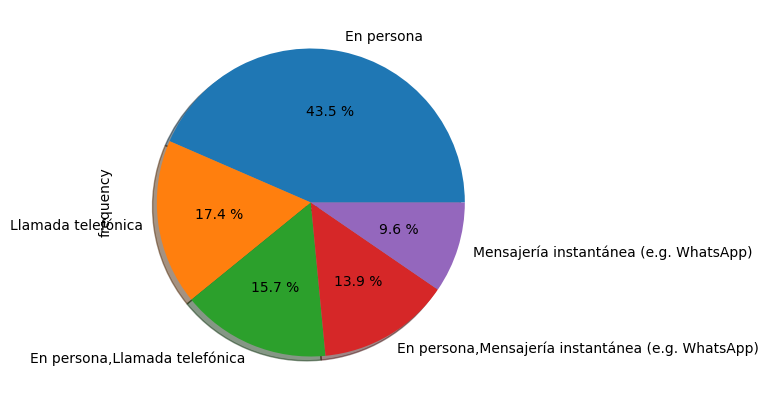

In [69]:
Filtro_index11["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variables Categóricas 12**
'232_type_of_store'

In [70]:
#Obtengo un análisis univariado de una variable categórica en específico
table12= freq_tbl(Datos_limpios['232_type_of_store'])
table12

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


In [71]:
Filtro= table12[table12['frequency']>4]
Filtro

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035


In [72]:
Filtro_index12= Filtro.set_index('232_type_of_store')
Filtro_index12

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035


Text(0, 0.5, 'Frecuencia')

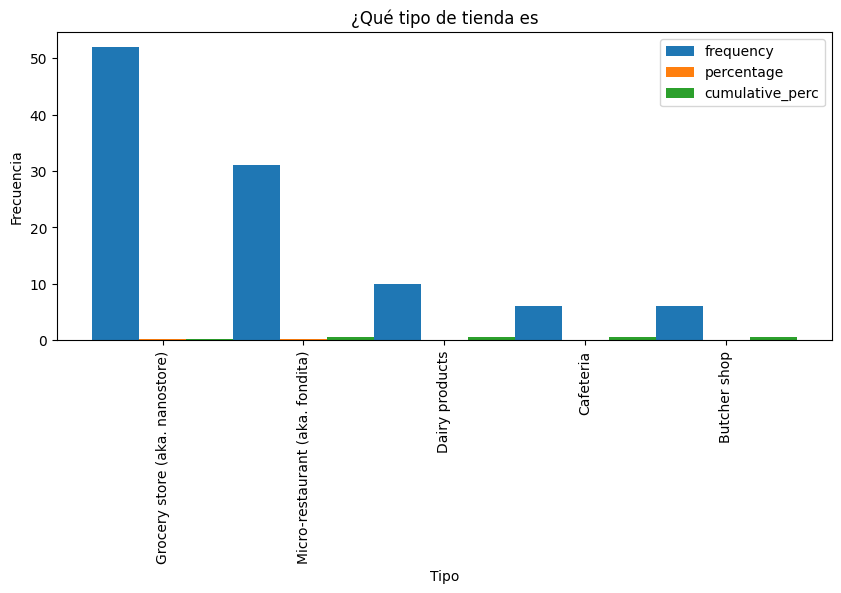

In [73]:
Filtro_index12.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('¿Qué tipo de tienda es')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')

## **Variables Categóricas 13**
'60_services' 

In [74]:
#Obtengo un análisis univariado de una variable categórica en específico
table13= freq_tbl(Datos_limpios['60_services'])
table13

,60_services,frequency,percentage,cumulative_perc
0,Ninguno,78,0.456140,0.484472
1,Entrega a domicilio,39,0.228070,0.726708
2,Recarga telefónica,22,0.128655,0.863354
3,"Recepción y entrega de paquetes (e.g. Amazon, ...",6,0.035088,0.900621
4,"Pago de servicios públicos (e.g. Yastas),Recar...",5,0.029240,0.931677
5,"Entrega a domicilio,Pago de servicios públicos...",4,0.023392,0.956522
6,"Entrega a domicilio,Recarga telefónica",2,0.011696,0.968944
7,Toma de papa nicolau,1,0.005848,0.975155
8,Renta de local,1,0.005848,0.981366
9,venta,1,0.005848,0.987578


In [75]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table13[table13['frequency']>3]
Filtro

,60_services,frequency,percentage,cumulative_perc
0,Ninguno,78,0.456140,0.484472
1,Entrega a domicilio,39,0.228070,0.726708
2,Recarga telefónica,22,0.128655,0.863354
3,"Recepción y entrega de paquetes (e.g. Amazon, ...",6,0.035088,0.900621
4,"Pago de servicios públicos (e.g. Yastas),Recar...",5,0.029240,0.931677
5,"Entrega a domicilio,Pago de servicios públicos...",4,0.023392,0.956522


In [76]:
Filtro_index13= Filtro.set_index('60_services')
Filtro_index13

,frequency,percentage,cumulative_perc
60_services,,,
Ninguno,78,0.456140,0.484472
Entrega a domicilio,39,0.228070,0.726708
Recarga telefónica,22,0.128655,0.863354
"Recepción y entrega de paquetes (e.g. Amazon, Mercado Libre)",6,0.035088,0.900621
"Pago de servicios públicos (e.g. Yastas),Recarga telefónica",5,0.029240,0.931677
"Entrega a domicilio,Pago de servicios públicos (e.g. Yastas),Recarga telefónica",4,0.023392,0.956522


Text(0, 0.5, 'Frecuencia')

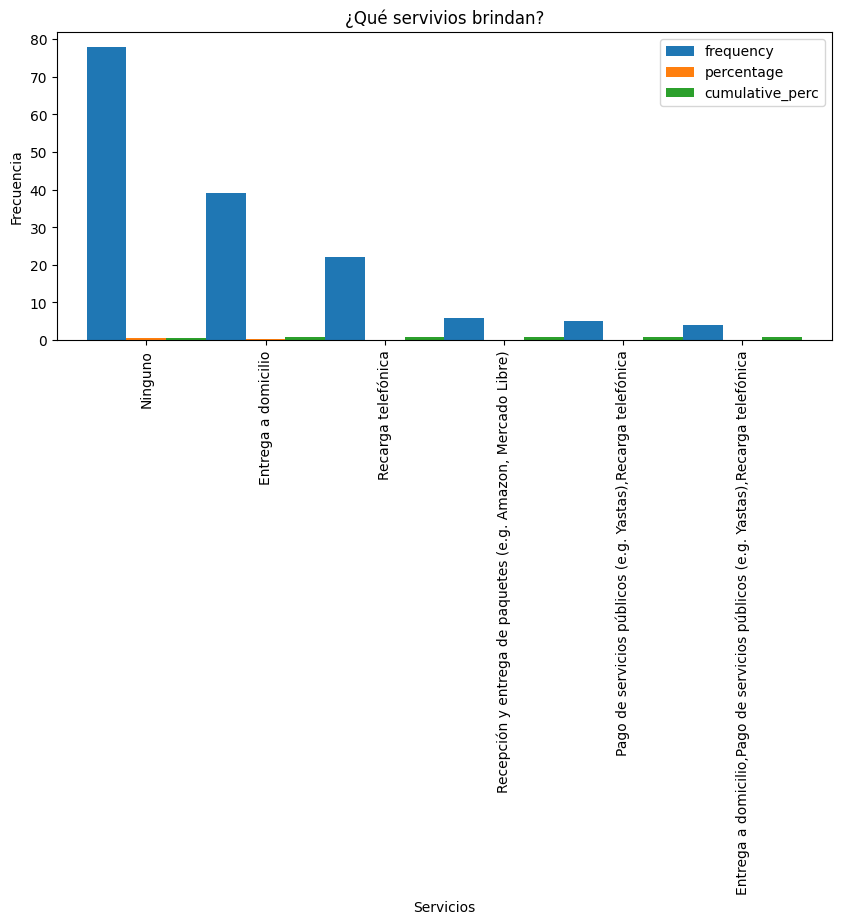

In [77]:
Filtro_index13.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('¿Qué servivios brindan?')
plt.xlabel('Servicios')
plt.ylabel('Frecuencia')

## **Variables Categóricas 14**
'99_does_the_micro_retailer_exhibits_products_outside_'

In [78]:
#Obtengo un análisis univariado de una variable categórica en específico
table14= freq_tbl(Datos_limpios['99_does_the_micro_retailer_exhibits_products_outside_'])
table14

,99_does_the_micro_retailer_exhibits_products_outside_,frequency,percentage,cumulative_perc
0,no,120,0.701754,0.701754
1,yes,51,0.298246,1.000000


In [79]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table14[table14['frequency']>1]
Filtro

,99_does_the_micro_retailer_exhibits_products_outside_,frequency,percentage,cumulative_perc
0,no,120,0.701754,0.701754
1,yes,51,0.298246,1.000000


In [80]:
Filtro_index14= Filtro.set_index('99_does_the_micro_retailer_exhibits_products_outside_')
Filtro_index14

,frequency,percentage,cumulative_perc
99_does_the_micro_retailer_exhibits_products_outside_,,,
no,120,0.701754,0.701754
yes,51,0.298246,1.000000


<Axes: ylabel='frequency'>

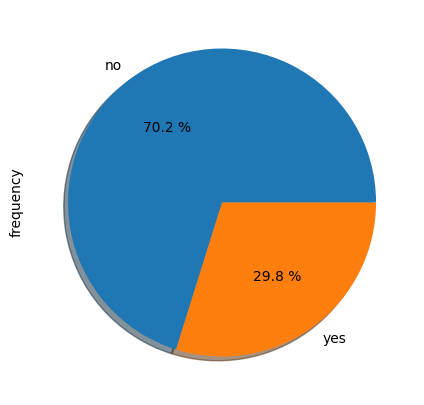

In [81]:
Filtro_index14["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variables Categóricas 15**
'49_inventory_records'

In [82]:
#Obtengo un análisis univariado de una variable categórica en específico
table15= freq_tbl(Datos_limpios['49_inventory_records'])
table15

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,63,0.368421,0.368421
1,No lo hago,36,0.210526,0.578947
2,En Excel,35,0.204678,0.783626
3,Software especializado + computadora,24,0.140351,0.923977
4,"En Excel,En papel",7,0.040936,0.964912
5,"En papel,Mental",3,0.017544,0.982456
6,Mentalmente,1,0.005848,0.988304
7,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.994152
8,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


In [83]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table15[table15['frequency']>1]
Filtro

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,63,0.368421,0.368421
1,No lo hago,36,0.210526,0.578947
2,En Excel,35,0.204678,0.783626
3,Software especializado + computadora,24,0.140351,0.923977
4,"En Excel,En papel",7,0.040936,0.964912
5,"En papel,Mental",3,0.017544,0.982456


In [84]:
Filtro_index15= Filtro.set_index('49_inventory_records')
Filtro_index15

,frequency,percentage,cumulative_perc
49_inventory_records,,,
En papel,63,0.368421,0.368421
No lo hago,36,0.210526,0.578947
En Excel,35,0.204678,0.783626
Software especializado + computadora,24,0.140351,0.923977
"En Excel,En papel",7,0.040936,0.964912
"En papel,Mental",3,0.017544,0.982456


<Axes: ylabel='frequency'>

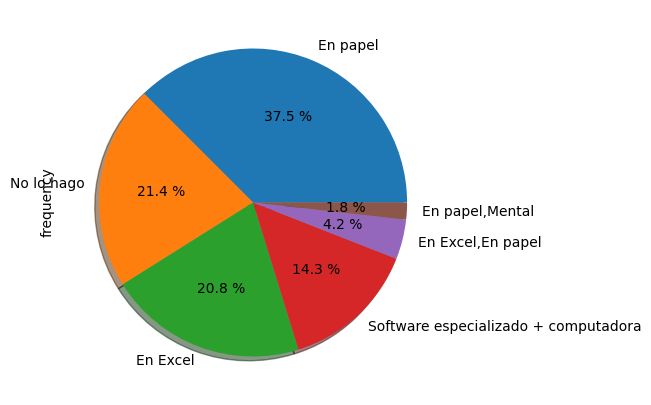

In [85]:
Filtro_index15["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variables Categóricas 16**
'260_technology_scalable'

In [86]:
#Obtengo un análisis univariado de una variable categórica en específico
table16= freq_tbl(Datos_limpios['260_technology_scalable'])
table16

,260_technology_scalable,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,65,0.380117,0.403727
1,De acuerdo,36,0.210526,0.627329
2,En desacuerdo,28,0.163743,0.801242
3,Ni de acuerdo ni en desacuerdo,18,0.105263,0.913043
4,Totalmente en desacuerdo,14,0.081871,1.000000


In [87]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table16[table16['frequency']>13]
Filtro

,260_technology_scalable,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,65,0.380117,0.403727
1,De acuerdo,36,0.210526,0.627329
2,En desacuerdo,28,0.163743,0.801242
3,Ni de acuerdo ni en desacuerdo,18,0.105263,0.913043
4,Totalmente en desacuerdo,14,0.081871,1.000000


In [88]:
Filtro_index16= Filtro.set_index('260_technology_scalable')
Filtro_index16

,frequency,percentage,cumulative_perc
260_technology_scalable,,,
Totalmente de acuerdo,65,0.380117,0.403727
De acuerdo,36,0.210526,0.627329
En desacuerdo,28,0.163743,0.801242
Ni de acuerdo ni en desacuerdo,18,0.105263,0.913043
Totalmente en desacuerdo,14,0.081871,1.000000


<Axes: ylabel='frequency'>

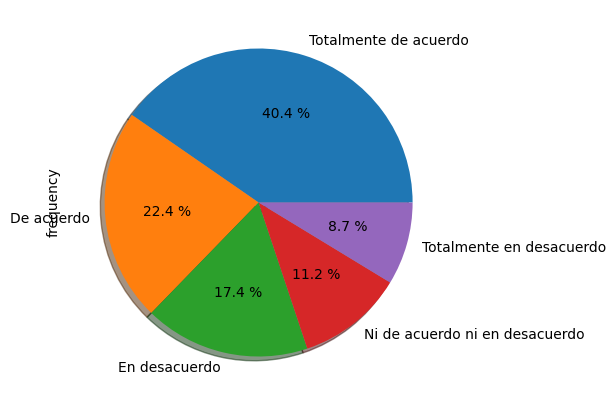

In [89]:
Filtro_index16["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variables Categóricas 17**
'28_prefered_payment_method' 

In [90]:
#Obtengo un análisis univariado de una variable categórica en específico
table17= freq_tbl(Datos_limpios['28_prefered_payment_method'])
table17

,28_prefered_payment_method,frequency,percentage,cumulative_perc
0,Tarjeta de débito y/o crédito,70,0.409357,0.619469
1,Efectivo,43,0.251462,1.000000


In [91]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table17[table17['frequency']>40]
Filtro

,28_prefered_payment_method,frequency,percentage,cumulative_perc
0,Tarjeta de débito y/o crédito,70,0.409357,0.619469
1,Efectivo,43,0.251462,1.000000


In [92]:
Filtro_index17= Filtro.set_index('28_prefered_payment_method')
Filtro_index17

,frequency,percentage,cumulative_perc
28_prefered_payment_method,,,
Tarjeta de débito y/o crédito,70,0.409357,0.619469
Efectivo,43,0.251462,1.000000


<Axes: ylabel='frequency'>

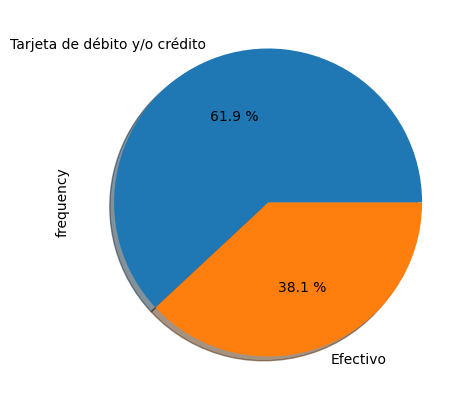

In [93]:
Filtro_index17["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variables Categóricas 18**
'214_customer_relationship_tools '

In [94]:
#Obtengo un análisis univariado de una variable categórica en específico
table18= freq_tbl(Datos_limpios['214_customer_relationship_tools'])
table18

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,45,0.263158,0.263158
1,Ninguna,39,0.228070,0.491228
2,Aplicación móvil,36,0.210526,0.701754
3,"Aplicación móvil,Redes sociales",15,0.087719,0.789474
4,Publicidad,14,0.081871,0.871345
5,Cuaderno,13,0.076023,0.947368
6,Teléfono,2,0.011696,0.959064
7,Físico,2,0.011696,0.970760
8,"Cuaderno,Redes sociales",1,0.005848,0.976608
9,"Aplicación móvil,De frente",1,0.005848,0.982456


In [95]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table18[table18['frequency']>3]
Filtro

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,45,0.263158,0.263158
1,Ninguna,39,0.228070,0.491228
2,Aplicación móvil,36,0.210526,0.701754
3,"Aplicación móvil,Redes sociales",15,0.087719,0.789474
4,Publicidad,14,0.081871,0.871345
5,Cuaderno,13,0.076023,0.947368


In [96]:
Filtro_index18= Filtro.set_index('214_customer_relationship_tools')
Filtro_index18

,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
Redes sociales,45,0.263158,0.263158
Ninguna,39,0.228070,0.491228
Aplicación móvil,36,0.210526,0.701754
"Aplicación móvil,Redes sociales",15,0.087719,0.789474
Publicidad,14,0.081871,0.871345
Cuaderno,13,0.076023,0.947368


<Axes: ylabel='frequency'>

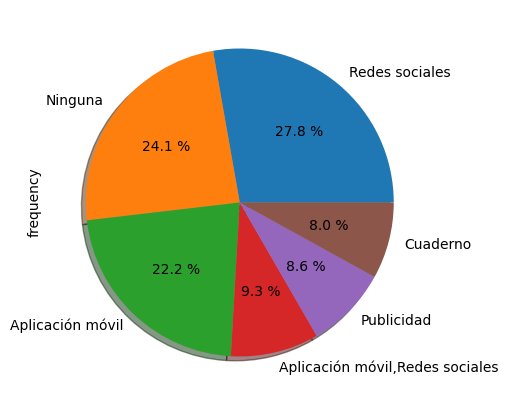

In [97]:
Filtro_index18["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variables Categóricas 19**
'108_does_the_micro_retailer_has_a_barred_window_'

In [98]:
#Obtengo un análisis univariado de una variable categórica en específico
table19= freq_tbl(Datos_limpios['108_does_the_micro_retailer_has_a_barred_window_'])
table19

,108_does_the_micro_retailer_has_a_barred_window_,frequency,percentage,cumulative_perc
0,no,124,0.725146,0.725146
1,yes,47,0.274854,1.000000


In [99]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table19[table19['frequency']>1]
Filtro

,108_does_the_micro_retailer_has_a_barred_window_,frequency,percentage,cumulative_perc
0,no,124,0.725146,0.725146
1,yes,47,0.274854,1.000000


In [100]:
Filtro_index19= Filtro.set_index('108_does_the_micro_retailer_has_a_barred_window_')
Filtro_index19

,frequency,percentage,cumulative_perc
108_does_the_micro_retailer_has_a_barred_window_,,,
no,124,0.725146,0.725146
yes,47,0.274854,1.000000


<Axes: ylabel='frequency'>

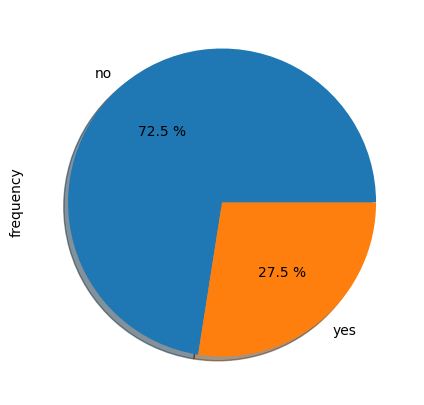

In [101]:
Filtro_index19["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variables Categóricas 20**
'53_special_conditions_suppliers'

In [102]:
#Obtengo un análisis univariado de una variable categórica en específico
table20= freq_tbl(Datos_limpios['53_special_conditions_suppliers'])
table20

,53_special_conditions_suppliers,frequency,percentage,cumulative_perc
0,Descuento por compras anticipadas,28,0.163743,0.17500
1,Crédito,22,0.128655,0.31250
2,"Consignación,Crédito,Descuento por compras ant...",19,0.111111,0.43125
3,Ninguno,15,0.087719,0.52500
4,ninguno,15,0.087719,0.61875
5,"Crédito,Descuento por compras anticipadas",13,0.076023,0.70000
6,Ninguna,12,0.070175,0.77500
7,"Consignación,Crédito",12,0.070175,0.85000
8,Consignación,7,0.040936,0.89375
9,Pago de contado,2,0.011696,0.90625


In [103]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table20[table20['frequency']>12]
Filtro

,53_special_conditions_suppliers,frequency,percentage,cumulative_perc
0,Descuento por compras anticipadas,28,0.163743,0.17500
1,Crédito,22,0.128655,0.31250
2,"Consignación,Crédito,Descuento por compras ant...",19,0.111111,0.43125
3,Ninguno,15,0.087719,0.52500
4,ninguno,15,0.087719,0.61875
5,"Crédito,Descuento por compras anticipadas",13,0.076023,0.70000


In [104]:
Filtro_index20= Filtro.set_index('53_special_conditions_suppliers')
Filtro_index20

,frequency,percentage,cumulative_perc
53_special_conditions_suppliers,,,
Descuento por compras anticipadas,28,0.163743,0.17500
Crédito,22,0.128655,0.31250
"Consignación,Crédito,Descuento por compras anticipadas,Recompra",19,0.111111,0.43125
Ninguno,15,0.087719,0.52500
ninguno,15,0.087719,0.61875
"Crédito,Descuento por compras anticipadas",13,0.076023,0.70000


Text(0, 0.5, 'Frecuencia')

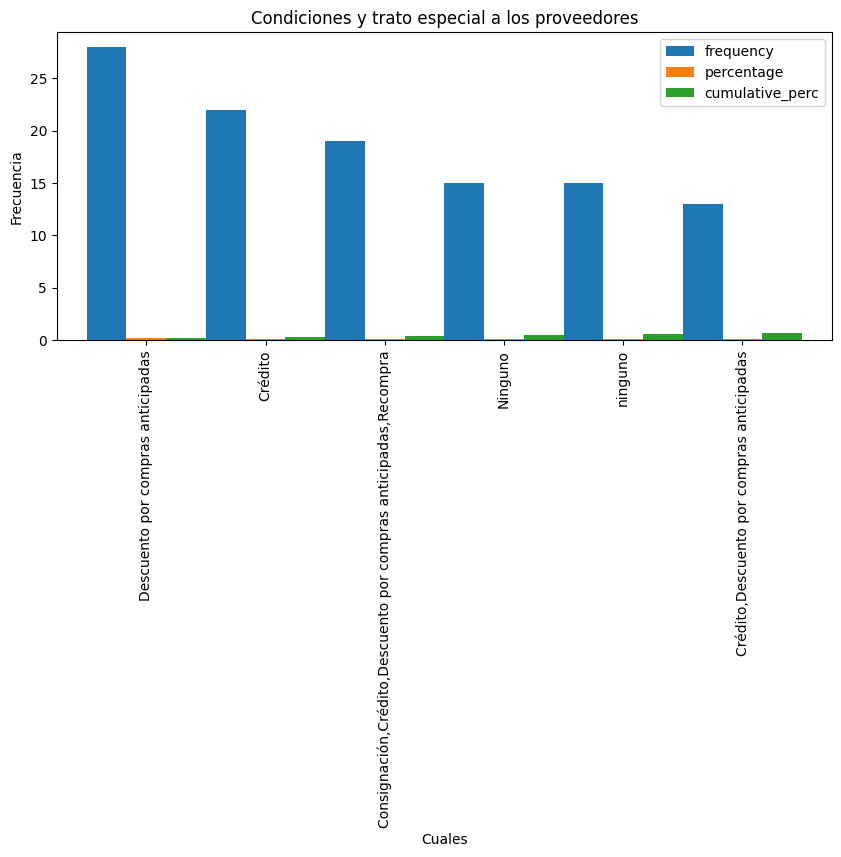

In [105]:
Filtro_index20.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Condiciones y trato especial a los proveedores')
plt.xlabel('Cuales')
plt.ylabel('Frecuencia')